# carregando a base de dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('claten_metadados_2016_a_2021.csv', encoding='latin1', delimiter=';')

In [3]:
dataset.head()

,ESTADO,MUNICÍPIO (S),ESCALA,FINALIDADE,NºAUT/ANO,EMPRESA,PROJETO
0,SP,Ribeirão Preto,1:5.000,Aerofotogrametria e Perfilamento Laser,028/2016,AEROCARTA,248/16
1,SP,Mogi Mirim,GSD 10 e 25 cm,Aerofotogrametria e Perfilamento a Laser,097/2016,AEROCARTA,250/16
2,SP,Araraquara,GSD 10 cm,Aerofotogrametria e Perfilamento a Laser,165/2016,AEROCARTA,253/2016
3,SP,Mogi Mirim,GSD 6 cm,Aerofotogrametria,059/2018,AEROCARTA,258/2018
4,SP,Mairiporã,GSD 10 cm,Aerofotogrametria e Perfilamento a Laser,157/2017,AEROCARTA,255/2017


<br></br>
# Pre-processamento e Limpeza
Grande parte dos dados das colunas vieram com erros redundâncias e até dados vazios,<br>
e nessa secção eu faço o tratamento e limpeza dos dados que não estão ajustados para analises

<b>Ajustando Nomes das colunas<b>

In [4]:
#reajustando nomes das colunas
dataset.columns = ['ESTADO','MUNICÍPIO','ESCALA','FINALIDADE','NºAUT/ANO','EMPRESA','PROJETO']

<b>separando coluna n_auto/ano em 2 colunas diferentes<b>

In [5]:
dataset['NºAUT'] = dataset['NºAUT/ANO'].str.split('/', expand = True)[0]
dataset['ANO'] = dataset['NºAUT/ANO'].str.split('/', expand = True)[1]
dataset = dataset.drop(columns=['NºAUT/ANO'])

<b>Tratando dados da coluna Estado<b>

In [6]:
#visualizando dados unicos
dataset['ESTADO'].unique()

array(['SP', 'MA', 'RS', 'SE', 'AL', 'PE', 'MG', 'BA', 'PI', 'RN', 'PB',
       'SC', 'CE', 'PR', 'MS', 'MT', 'GO', 'PA', 'TO', 'RJ', 'ES', 'AC',
       'AM', 'AP', 'RS ', 'SP ', 'DF', ' CE', 'RO', 'AM ', nan, 'sp'],
      dtype=object)

In [7]:
#substituindo erros de digitaçao nos valores
dataset.loc[dataset['ESTADO'] ==  'AM ','ESTADO'] = 'AM'
dataset.loc[dataset['ESTADO'].isin(['SP ','sp']),'ESTADO'] = 'SP'
dataset.loc[dataset['ESTADO'] ==  ' CE','ESTADO'] = 'CE'
dataset.loc[dataset['ESTADO'] ==  'RS ','ESTADO'] = 'RS'
dataset = dataset.dropna(subset='ESTADO')

In [8]:
#visualizando dados unicos
dataset['ESTADO'].unique()

array(['SP', 'MA', 'RS', 'SE', 'AL', 'PE', 'MG', 'BA', 'PI', 'RN', 'PB',
       'SC', 'CE', 'PR', 'MS', 'MT', 'GO', 'PA', 'TO', 'RJ', 'ES', 'AC',
       'AM', 'AP', 'DF', 'RO'], dtype=object)

<br>
<br>
<b>removendo coluna Escala por falta de utilidade para analise<b>
<br>

In [9]:
dataset = dataset.drop(columns=['ESCALA'])
dataset.head()

,ESTADO,MUNICÍPIO,FINALIDADE,EMPRESA,PROJETO,NºAUT,ANO
0,SP,Ribeirão Preto,Aerofotogrametria e Perfilamento Laser,AEROCARTA,248/16,028,2016
1,SP,Mogi Mirim,Aerofotogrametria e Perfilamento a Laser,AEROCARTA,250/16,097,2016
2,SP,Araraquara,Aerofotogrametria e Perfilamento a Laser,AEROCARTA,253/2016,165,2016
3,SP,Mogi Mirim,Aerofotogrametria,AEROCARTA,258/2018,059,2018
4,SP,Mairiporã,Aerofotogrametria e Perfilamento a Laser,AEROCARTA,255/2017,157,2017


<b>Tratando dados da coluna Finalidade<b>

In [10]:
#visualizando dados unicos
dataset['FINALIDADE'].unique()

array(['Aerofotogrametria e Perfilamento Laser',
       'Aerofotogrametria e Perfilamento a Laser', 'Aerofotogrametria',
       'Aerofotogrametria e perfilamento a laser',
       'Aerofotogramteria e Perfilamento a Laser', 'Aerofotogrametria  ',
       'Perfilamento a Laser',
       'Aerofotogrametria e Perfilamento a Laser ', 'Aerofotogrametria ',
       'Aerofotogrametria e Perfilamento a laser', 'Interferometria SAR',
       'Hiperspectral',
       'Magnetométrico, eletromagnético e     sistema de vídeo ',
       'Aeromagnetométrico, Aeroeletromagnetométrico',
       'Aeromagnetométrico, Aeroeletromagnético', 'Aeromagnetométrico',
       'Geofísico', 'Aerofotogramétrico',
       'Perfilamento a Laser e Aerofotogrametria',
       'Aerofogrametria e Perfilamento a Laser',
       'Aerofotogrametria o Perfilamento a Laser', 'Perfilamento Laser',
       'Radar',
       'Aerofotogrametria,  perfilamento a laser e Multiespectral',
       'Aerofotogrametria, Perfilamento laser', 'Perfilamen

In [11]:
#limpeza de dados redundantes (Aerofotogrametria e Perfilamento a Laser)
dataset.loc[dataset['FINALIDADE'].isin([
    'Aerofotogrametria e Perfilamento a Laser',
    'Aerofotogrametria e perfilamento a laser',
    'Aerofotogramteria e Perfilamento a Laser',
    'Aerofotogrametria e Perfilamento a Laser ',
    'Aerofotogrametria e Perfilamento a laser',
    'Perfilamento a Laser e Aerofotogrametria',
    'Aerofogrametria e Perfilamento a Laser',
    'Aerofotogrametria, Perfilamento laser',
    'Aerofotogrametria o Perfilamento a Laser',
]), 'FINALIDADE'] = 'Aerofotogrametria e Perfilamento Laser'
#limpeza de dados redundantes (Aerofotogrametria)
dataset.loc[dataset['FINALIDADE'].isin([
    'Aerofotogrametria  ',
    'Aerofotogrametria ',
    'Aerofotogramétrico',
]), 'FINALIDADE'] = 'Aerofotogrametria'
dataset.loc[
    dataset['FINALIDADE']
    ==  'Aerofotogrametria,  perfilamento a laser e Multiespectral', 'FINALIDADE'] = 'Aerofotogrametria, perfilamento a laser e Multiespectral'
dataset.loc[
    dataset['FINALIDADE']
    ==  'Aeromagnetométrico, Aeroeletromagnético', 'FINALIDADE'] = 'Aeromagnetométrico e Aeroeletromagnético'
#limpeza de dados redundantes (Aerofotogrametria)
dataset.loc[dataset['FINALIDADE'].isin([
    'Aeromagnetométrico, Aeroeletromagnetométrico',
]), 'FINALIDADE'] = 'Aeromagnetométrico e Aeroeletromagnetométrico'
dataset.loc[
    dataset['FINALIDADE']
    ==  'Magnetométrico, eletromagnético e     sistema de vídeo ','FINALIDADE'] = 'Magnetométrico, eletromagnético e sistema de vídeo'
dataset.loc[
    dataset['FINALIDADE'].isin(['Perfilamento Laser', 'Perfilamento laser']), 'FINALIDADE'] = 'Perfilamento a Laser'

<b>tratando dados da coluna Ano<b>

In [12]:
dataset['ANO'].unique()

array(['2016', '2018', '2017', '2019', '218', '17', '2020', None, '2021',
       nan], dtype=object)

In [13]:
#substituindo erros de digitaçao nos valores
dataset.loc[dataset['ANO'] ==  '17 ','ANO'] = '2017'
dataset.loc[dataset['ANO'] ==  '17','ANO'] = '2017'
dataset.loc[dataset['ANO'] ==  '218','ANO'] = '2018'
dataset = dataset.dropna(subset='ANO')

<br></br>
# Análise Exploratória dos Dados
nesta etapa será onde irá se explorar estátisticamente e analisar possiveis insights
que possam ser gerados utilizando a base de dados

<br></br>
## projetos por ano

<br></br>
#### em que ano tivemos mais projetos de aerolevantamentos?

<AxesSubplot:xlabel='ANO', ylabel='count'>

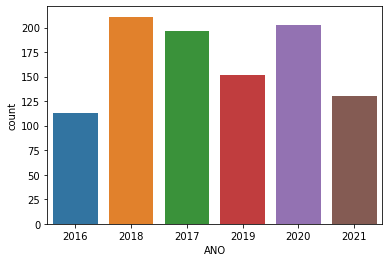

In [14]:
sns.countplot(x='ANO', data=dataset)

## finalidade de levantamento mais frequente

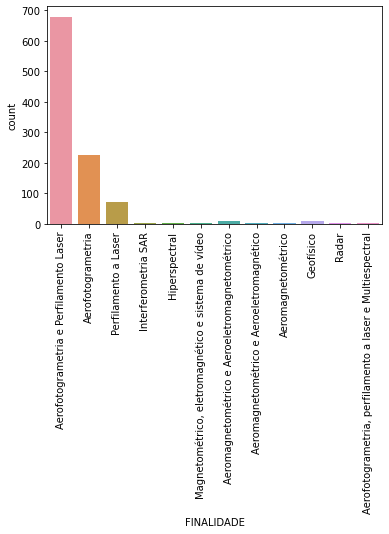

In [15]:
ax = sns.countplot(x='FINALIDADE', data=dataset)
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Qual empresa mais produziu projetos?

### Geral:

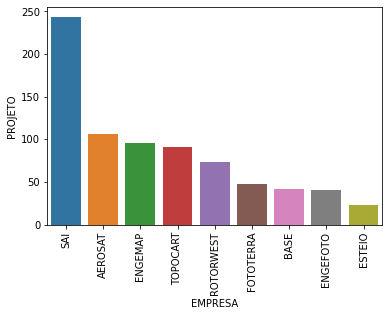

In [16]:
agrupado_empresas = dataset.groupby('EMPRESA').count()
agrupado_empresas = pd.DataFrame(agrupado_empresas['PROJETO'])
mais_lancamentos = agrupado_empresas.sort_values('PROJETO', ascending=False)[0:9]
ax = sns.barplot(x = mais_lancamentos.index, y = 'PROJETO', data=mais_lancamentos)
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Por ano:

In [17]:
lancamentos_group = dataset.groupby(['EMPRESA','ANO']).count().unstack()
lancamentos_group = lancamentos_group['PROJETO'].fillna(0)

In [18]:
empresas_top_10 = lancamentos_group.sort_values(['2016','2017','2018',
                                                 '2019','2020','2021'], ascending=False).head(5).T

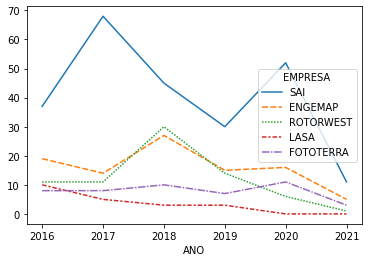

In [19]:
ax = sns.lineplot(data=empresas_top_10)